In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE


In [104]:
data = pd.read_csv("cleaned_credit.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [105]:
data.shape

(283726, 30)

In [106]:
df =data.copy()

In [107]:
y_true = data["Class"]
data.drop("Class",axis=1,inplace=True)

#### Training model

In [108]:
iso = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    max_features=1.0,
    contamination=0.05
)
iso

IsolationForest(contamination=0.05)

In [109]:
data["anomaly_scor"] = iso.fit_predict(data)

In [110]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly_scor
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,1


In [111]:
data.anomaly_scor.value_counts()

anomaly_scor
 1    269539
-1     14187
Name: count, dtype: int64

In [112]:
data["pred"] = data["anomaly_scor"].apply(lambda x:1 if x ==-1 else 0)

In [113]:
y_pred = data["pred"]

In [114]:
confusion_matrix(y_true,y_pred)

array([[269461,  13792],
       [    78,    395]], dtype=int64)

<Axes: >

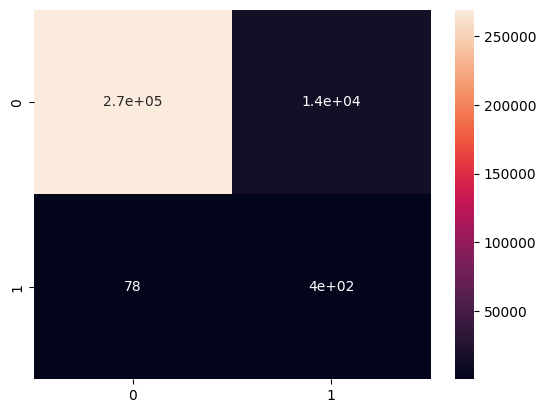

In [115]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True)

In [116]:
print(f"\n Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"\n Precision: {precision_score(y_true, y_pred)}")
print(f"\n Recall: {recall_score(y_true, y_pred)}")
print(f"\n F1 Score: {f1_score(y_true, y_pred)}")


 Accuracy: 0.9511148079485137

 Precision: 0.027842390921265947

 Recall: 0.8350951374207188

 F1 Score: 0.0538881309686221


#### oversampling

In [117]:
fraud = df[df["Class"]==1]
n_fraud = df[df["Class"]==0]

In [118]:
re_n_fraud =n_fraud.sample(len(fraud))

In [119]:
un_data = pd.concat([fraud,re_n_fraud],ignore_index=True)

In [120]:
un_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [121]:
oy_true = un_data["Class"]
x = un_data.drop("Class", axis=1)

In [122]:
iso = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    max_features=1.0,
    contamination=0.05
)
iso

IsolationForest(contamination=0.05)

In [123]:
x["anomaly_scor"] = iso.fit_predict(x)

In [124]:
x["pred"] = x["anomaly_scor"].apply(lambda x:1 if x ==-1 else 0)

In [125]:
y_pred = x["pred"]

In [126]:
print(f"\n Accuracy: {accuracy_score(oy_true, y_pred)}")
print(f"\n Precision: {precision_score(oy_true, y_pred)}")
print(f"\n Recall: {recall_score(oy_true, y_pred)}")
print(f"\n F1 Score: {f1_score(oy_true, y_pred)}")


 Accuracy: 0.5422832980972516

 Precision: 0.9166666666666666

 Recall: 0.09302325581395349

 F1 Score: 0.1689059500959693


### over sampling

In [136]:
df.shape

(283726, 32)

In [137]:
x = df.drop('Class', axis = 1) 
y=df['Class']

In [141]:
x_reshape,y_reshape = SMOTE().fit_resample(x,y)

In [142]:
x_reshape.size,y_reshape.size

(17561686, 566506)

In [143]:
iso = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    max_features=1.0,
    contamination=0.05
)
iso

IsolationForest(contamination=0.05)

In [144]:
df["anomaly_scor"] = iso.fit_predict(df)

In [145]:
df["pred"] = df["anomaly_scor"].apply(lambda x:1 if x ==-1 else 0)

In [150]:
yy_pred = df["pred"]

In [151]:
print(f"\n Accuracy: {accuracy_score(y_reshape, y_pred)}")
print(f"\n Precision: {precision_score(y_reshape, y_pred)}")
print(f"\n Recall: {recall_score(y_reshape, y_pred)}")
print(f"\n F1 Score: {f1_score(y_reshape, y_pred)}")

ValueError: Found input variables with inconsistent numbers of samples: [566506, 283726]